In [1]:
import os
import datetime as dt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_datareader.data as web
from scipy import stats
import statsmodels.api as sm
import seaborn as sns
data_dir = "./data/oil_price_analysis"
os.makedirs(data_dir, exist_ok=True)

#Crude Oil Prices: West Texas Intermediate (WTI) — Cushing, Oklahoma (DCOILWTICO)
#WTI is one of the leading oil price indices due to the large volume of transactions and market participants. 
#We will download the data for the entire period available and use it for analysis.

In [2]:
start = dt.datetime(1950, 1, 1)
end = dt.datetime(2022, 5, 21)
wti_oil_price = web.DataReader('DCOILWTICO', 'fred', start, end)
# save the data
file_path = f"{data_dir}/DCOILWTICO.csv"
wti_oil_price.to_csv(file_path)
wti_oil_price

,DCOILWTICO
DATE,
1986-01-02,25.56
1986-01-03,26.00
1986-01-06,26.53
1986-01-07,25.85
1986-01-08,25.87
...,...
2022-05-16,114.07
2022-05-17,112.31
2022-05-18,109.67


In [3]:
wti_oil_price = pd.read_csv(file_path, index_col="DATE", parse_dates=True)
print(wti_oil_price.shape)
wti_oil_price.tail(3)
wti_oil_price

(9492, 1)


,DCOILWTICO
DATE,
1986-01-02,25.56
1986-01-03,26.00
1986-01-06,26.53
1986-01-07,25.85
1986-01-08,25.87
...,...
2022-05-16,114.07
2022-05-17,112.31
2022-05-18,109.67


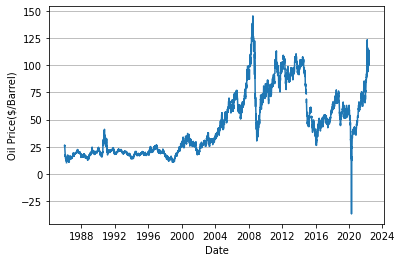

In [4]:
plt.plot(wti_oil_price)
plt.grid(axis="y")
plt.xlabel("Date")
plt.ylabel("Oil Price($/Barrel)")
plt.show()

In [6]:
# Resampling: The data now is daily data, but data is not available every day. Also, there are more than 30 years of data, so it takes a lot of computation. So, in order to solve those problems, we will convert the data to monthly data. Here, the price on the last trading day of each month is treated as the price for that month.

In [7]:
monthly_data_list = []
year_list = wti_oil_price.index.year.unique()
month_list = sorted(wti_oil_price.index.month.unique())
for year in year_list:
    for month in month_list:
        last_day_data = wti_oil_price[(wti_oil_price.index.year == year) &
                               (wti_oil_price.index.month == month)].tail(1)
        monthly_data_list.append(last_day_data)
wti_oil_price_monthly = pd.concat(monthly_data_list)
wti_oil_price_monthly.index = pd.to_datetime(
    wti_oil_price_monthly.index.strftime("%Y-%m"))  # reset index to YYYY-01-01
wti_oil_price_monthly.tail()

,DCOILWTICO
DATE,
2022-01-01,89.16
2022-02-01,96.13
2022-03-01,100.53
2022-04-01,104.59
2022-05-01,112.63


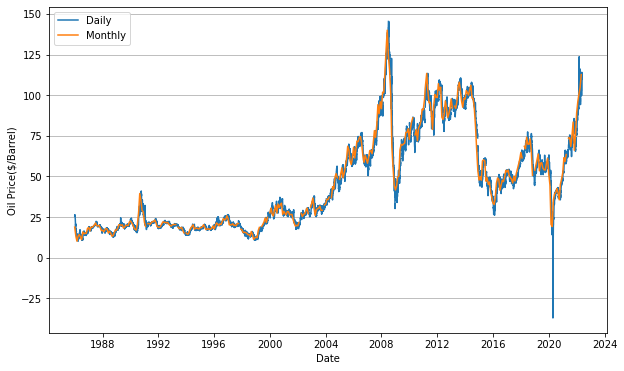

In [9]:
plt.figure(figsize=(10,6))
plt.plot(wti_oil_price, label="Daily")
plt.plot(wti_oil_price_monthly ,label="Monthly")
plt.grid(axis="y")
plt.xlabel("Date")
plt.ylabel("Oil Price($/Barrel)")
plt.legend(loc="upper left")
plt.show()

Draw a graph to confirm that although the number of data has decreased significantly, the trend of the time-series data has not changed.

Moving Average
Moving averages are also useful for capturing broad trends. Moving averages calculate the average of the n most recent data, rather than the average of all data. By moving the window in which the average is calculated, the time-series data can be smoothed out.

Moving averages can be calculated using the pandas rolling method.

Here we will calculate and plot the 50-day and 200-day moving averages.

In [11]:
# moving average
# moving average
wti_oil_price_moving_average_50 = wti_oil_price.rolling(50).mean()
wti_oil_price_moving_average_200 = wti_oil_price.rolling(200).mean()

In [13]:
wti_oil_price_moving_average_50

,DCOILWTICO
DATE,
1986-01-02,NaN
1986-01-03,NaN
1986-01-06,NaN
1986-01-07,NaN
1986-01-08,NaN
...,...
2022-05-16,NaN
2022-05-17,NaN
2022-05-18,NaN


In [15]:
wti_oil_price_moving_average_200

,DCOILWTICO
DATE,
1986-01-02,NaN
1986-01-03,NaN
1986-01-06,NaN
1986-01-07,NaN
1986-01-08,NaN
...,...
2022-05-16,NaN
2022-05-17,NaN
2022-05-18,NaN


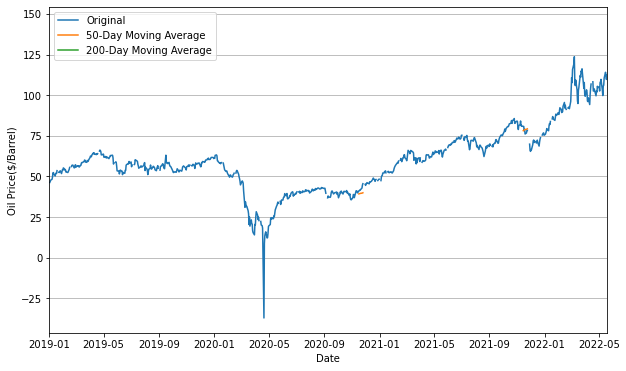

In [16]:
plt.figure(figsize=(10,6))
plt.plot(wti_oil_price, label="Original")
plt.plot(wti_oil_price_moving_average_50, label="50-Day Moving Average")
plt.plot(wti_oil_price_moving_average_200, label="200-Day Moving Average")
plt.grid(axis="y")
plt.xlabel("Date")
plt.ylabel("Oil Price($/Barrel)")
plt.legend(loc="upper left")
plt.xlim((dt.datetime(2019, 1, 1), max(wti_oil_price.index)))
plt.show()

In [63]:
# Setting our API key
quandl.ApiConfig.api_key = "C6Qgn_A4j5h8viyhc1b8"

# Importing our data
data = quandl.get("FRED/DCOILBRENTEU", start_date="2000-01-01", end_date="2022-05-20")

In [64]:
data_new = quandl.get("FRED/DCOILWTICO", start_date="2000-01-01", end_date="2022-05-20")

In [21]:
import sklearn
import matplotlib
import quandl

In [20]:
!pip install quandl

In [24]:

# A machine learning library used for linear regression
from sklearn.linear_model import LinearRegression
# numpy and pandas will be used for data manipulation
import numpy as np
import pandas as pd
# matplotlib will be used for visually representing our data
import matplotlib.pyplot as plt
# Quandl will be used for importing historical oil prices
import quandl

In [25]:
data

,Value
Date,
2000-01-04,23.95
2000-01-05,23.72
2000-01-06,23.55
2000-01-07,23.35
2000-01-10,22.77
...,...
2022-05-16,114.86
2022-05-17,112.89
2022-05-18,110.04


<AxesSubplot:xlabel='Date', ylabel='Crude Oil Prices: Brent - Europe'>

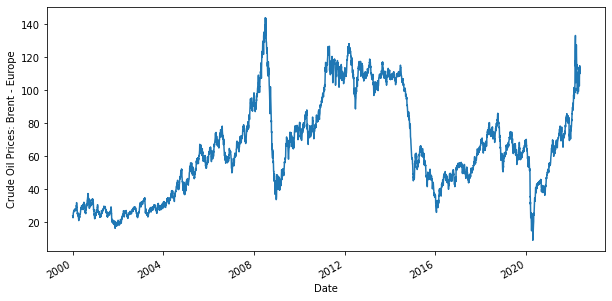

In [26]:
# Setting the text on the Y-axis
plt.ylabel("Crude Oil Prices: Brent - Europe")

# Setting the size of our graph
data.Value.plot(figsize=(10,5))

<AxesSubplot:xlabel='Date', ylabel='Crude Oil Prices: West Texas Intermediate'>

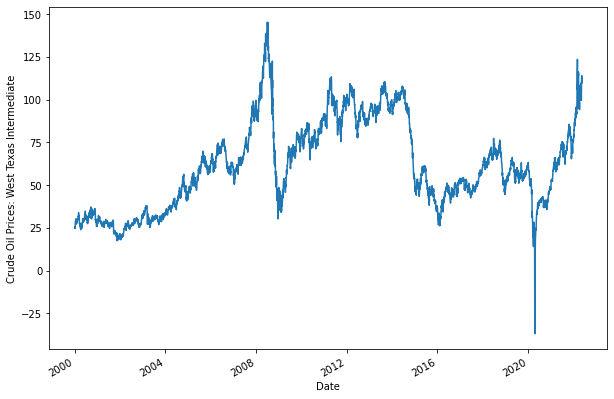

In [66]:
# Setting the text on the Y-axis
plt.ylabel("Crude Oil Prices: West Texas Intermediate")

# Setting the size of our graph
data_new.Value.plot(figsize=(10,7))

Now that we have properly visualized our data, we are going to define our explanatory variables — the features we are going to use to predict the price of oil. The variables we will be using at this stage, are the moving averages for the past three and nine days.

In [27]:
data['MA3'] = data['Value'].shift(1).rolling(window=3).mean()
data['MA9']= data['Value'].shift(1).rolling(window=9).mean()

In [67]:
data_new['MA3'] = data['Value'].shift(1).rolling(window=3).mean()
data_new['MA9']= data['Value'].shift(1).rolling(window=9).mean()

In [28]:
# Dropping the NaN values
data = data.dropna()

# Initialising X and assigning the two feature variables
X = data[['MA3','MA9']]

# Getting the head of the data
X.head()

,MA3,MA9
Date,,
2000-01-17,25.006667,24.032222
2000-01-18,25.463333,24.258889
2000-01-19,25.933333,24.546667
2000-01-20,26.156667,24.837778
2000-01-21,26.246667,25.161111


In [68]:
# Dropping the NaN values
data_new = data_new.dropna()

# Initialising X and assigning the two feature variables
X = data_new[['MA3','MA9']]

# Getting the head of the data
X.tail()

,MA3,MA9
Date,,
2022-05-16,109.293333,108.733333
2022-05-17,111.680000,109.835556
2022-05-18,113.290000,110.097778
2022-05-19,112.596667,109.867778
2022-05-20,112.050000,109.796667


In [29]:
# Setting-up the dependent variable
y = data['Value']

# Getting the head of the data
y.head()

Date
2000-01-17    25.99
2000-01-18    26.31
2000-01-19    26.17
2000-01-20    26.26
2000-01-21    27.18
Name: Value, dtype: float64

In [69]:
# Setting-up the dependent variable
y = data_new['Value']

# Getting the head of the data
y.head()

Date
2000-01-18    28.98
2000-01-19    29.11
2000-01-20    29.67
2000-01-21    29.71
2000-01-24    29.25
Name: Value, dtype: float64

Training
Now that everything is set-up, we are going to split our dataset into two distinct parts. We are going to assign 80% of our data into a training set, responsible for training the model. The rest 20% will be assigned to a testing set, used to estimate the accuracy of the model. This way, by connecting the input from the training set with the expected result from the testing set, we create a linear regression model.

In [70]:
# Setting the training set to 80% of the data
training = 0.8
t = int(training*len(data_new))

# Training dataset
X_train = X[:t]
y_train = y[:t]

# Testing dataset
X_test = X[t:]
y_test = y[t:]

In [31]:
# Generate the coefficient and constant for the regression
model = LinearRegression().fit(X_train,y_train)

In [71]:
# Generate the coefficient and constant for the regression
model = LinearRegression().fit(X_train,y_train)

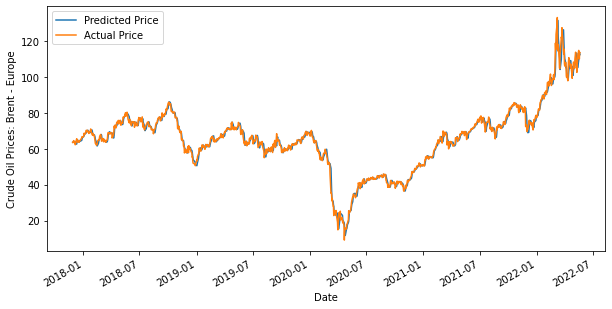

In [32]:
predicted_price = model.predict(X_test)
predicted_price = pd.DataFrame(predicted_price,index=y_test.index,columns = ['price'])
predicted_price.plot(figsize=(10,5))
y_test.plot()
plt.legend(['Predicted Price','Actual Price'])
plt.ylabel("Crude Oil Prices: Brent - Europe")
plt.show()

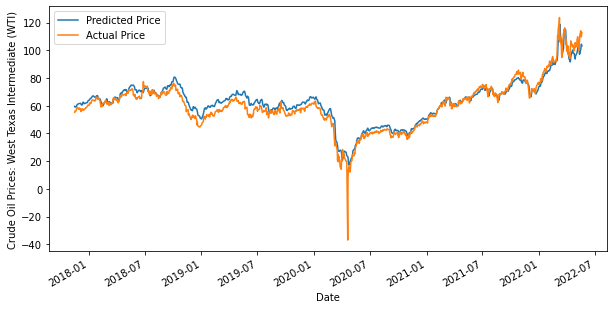

In [72]:
predicted_price = model.predict(X_test)
predicted_price = pd.DataFrame(predicted_price,index=y_test.index,columns = ['price'])
predicted_price.plot(figsize=(10,5))
y_test.plot()
plt.legend(['Predicted Price','Actual Price'])
plt.ylabel("Crude Oil Prices: West Texas Intermediate (WTI)")
plt.show()

In [60]:
# Computing the accuracy of our model
R_squared_score = model.score(X[t:],y[t:])*100
accuracy = ("{0:.2f}".format(R_squared_score))
print ("The model has a " + accuracy + "% accuracy.")

The model has a 99.73% accuracy.


In [73]:
# Computing the accuracy of our model
R_squared_score = model.score(X[t:],y[t:])*100
accuracy = ("{0:.2f}".format(R_squared_score))
print ("The model has a " + accuracy + "% accuracy.")

The model has a 92.91% accuracy.


In [56]:
from sklearn import linear_model
from sklearn.linear_model import LinearRegression

In [34]:
# A machine learning library used for linear regression
from sklearn.linear_model import LinearRegression

In [40]:
# A machine learning library used for linear regression
from sklearn.linear_model import LinearRegression
# numpy and pandas will be used for data manipulation
import numpy as np
import pandas as pd
# matplotlib will be used for visually representing our data
import matplotlib.pyplot as plt

In [41]:
# Importing our data
data = quandl.get("FRED/DCOILBRENTEU", start_date="1987-05-20", end_date="2020-01-01")
data.head()

,Value
Date,
1987-05-20,18.63
1987-05-21,18.45
1987-05-22,18.55
1987-05-25,18.60
1987-05-26,18.63


,MA3,MA9
Date,,
1987-05-22,18.45,18.540
1987-05-25,18.55,18.500
1987-05-26,18.60,18.575
1987-05-27,18.63,18.615
1987-05-28,18.60,18.615


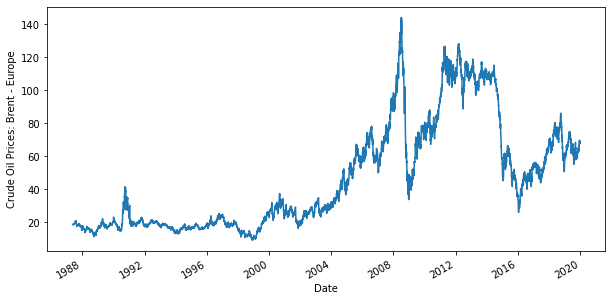

In [42]:
# Setting the text on the Y-axis
plt.ylabel("Crude Oil Prices: Brent - Europe")

# Setting the size of our graph
data.Value.plot(figsize=(10,5))

data['MA3'] = data['Value'].shift(1).rolling(window=1).mean()
data['MA9']= data['Value'].shift(1).rolling(window=2).mean()

# Dropping the NaN values
data = data.dropna()

# Initialising X and assigning the two feature variables
X = data[['MA3','MA9']]

# Getting the head of the data
X.head()

In [43]:
# Setting-up the dependent variable
y = data['Value']

# Getting the head of the data
y.head()

Date
1987-05-22    18.55
1987-05-25    18.60
1987-05-26    18.63
1987-05-27    18.60
1987-05-28    18.60
Name: Value, dtype: float64

In [44]:
# Setting the training set to 80% of the data
training = 0.8
t = int(training*len(data))

# Training dataset
X_train = X[:t]
y_train = y[:t]

# Testing dataset
X_test = X[t:]
y_test = y[t:]

# Generate the coefficient and constant for the regression
model = LinearRegression().fit(X_train,y_train)
#linear = LinearRegression().fit(X_train,y_train) 

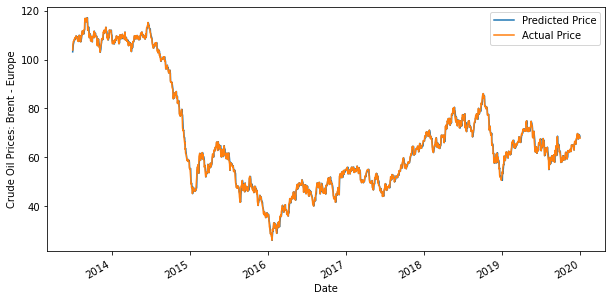

In [45]:
predicted_price = model.predict(X_test)
predicted_price = pd.DataFrame(predicted_price,index=y_test.index,columns = ['price'])
predicted_price.plot(figsize=(10,5))
y_test.plot()
plt.legend(['Predicted Price','Actual Price'])
plt.ylabel("Crude Oil Prices: Brent - Europe")
plt.show()

In [59]:
R_squared_score = model.score(X[t:],y[t:])*100
accuracy = ("{0:.2f}".format(R_squared_score))
print ("The model has a " + accuracy + "% accuracy.")

The model has a 99.73% accuracy.


In [50]:
import numpy
from sklearn.metrics import r2_score

In [55]:
# LinearRegression is a machine learning library for linear regression 
from sklearn.linear_model import LinearRegression 
# pandas and numpy are used for data manipulation 
import pandas as pd 
import numpy as np 